## Astronomical Techniques - 1

This notebook is to ease working of some assignments and experiments of Astrotech-1 course by Prof. AN Ramaprakash.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Assignment 1
##### Question 7
Need to find the values and the errors of distance from redshift measures.

In [2]:
tf.reset_default_graph()
tf.set_random_seed(0)
H=tf.placeholder(tf.float32)
z=tf.placeholder(tf.float32)
sigma_H=tf.placeholder(tf.float32)
sigma_z=tf.placeholder(tf.float32)
c=3e5
d=(c/H)*(1-2/(tf.square(z+1)+1)) #distance measure.
err_H=tf.gradients(d,H)
err_z=tf.gradients(d,z)
err_d_2=tf.square(err_H)*tf.square(sigma_H) + tf.square(err_z)*tf.square(sigma_z)
sigma_d = tf.sqrt(err_d_2)
#Thus, we have sigma_d and d

In [3]:
sess = tf.Session()
tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


<tf.Operation 'init' type=NoOp>

Since our graph is defined, we just need to feed in the value of z and error therein iteratively, and obtain distance measure for each bin.

In [4]:
print "Distance  = :",
print str(sess.run(d,feed_dict={z:5.8,H:72})),
print "Plus or minus "+str(sess.run(sigma_d,feed_dict={z:5.8,H:72,sigma_H:8,sigma_z:0.05}))

Distance  = : 3990.2625 Plus or minus [443.36978]


In [5]:
z_list=np.asarray([[5.7,5.8,5.95,6.1,6.25,6.4],[0.05,0.05,0.1,0.05,0.1,0.05]])
print z_list
H_constant=np.asarray([[72.0],[8.0]])
print H_constant

[[5.7  5.8  5.95 6.1  6.25 6.4 ]
 [0.05 0.05 0.1  0.05 0.1  0.05]]
[[72.]
 [ 8.]]


In [6]:
d_list=np.zeros(z_list.shape)
for i in xrange(z_list.shape[1]):
    d_list[0,i]=sess.run(d,feed_dict={z:z_list[0,i],H:H_constant[0]})
    d_list[1,i]=sess.run(sigma_d,feed_dict={z:z_list[0,i],H:H_constant[0],sigma_z:z_list[1,i],sigma_H:H_constant[1]})
print d_list.shape    
    

(2, 6)


In [8]:
print d_list.shape
print "Distances: " +str(d_list[0,:])
print "Errors: " +str(d_list[1,:])

(2, 6)
Distances: [3985.07275391 3990.26245117 3997.6418457  4004.57104492 4011.08496094
 4017.21655273]
Errors: [442.79379272 443.36978149 444.20797729 444.95797729 445.6960144
 446.36181641]


<ErrorbarContainer object of 3 artists>

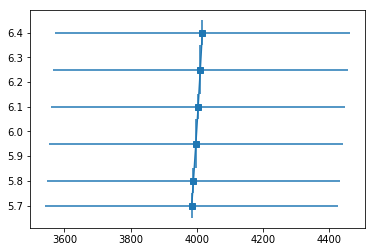

In [45]:
#Plotting the distance and z plot:
plt.errorbar(d_list[0,:],z_list[0,:],yerr=z_list[1,:],xerr=d_list[1,:],marker='s')

### Assignment Question 10
Spectral irradiance of moon 


(9,)


Text(0.5,0,'Wavelength (nm)')

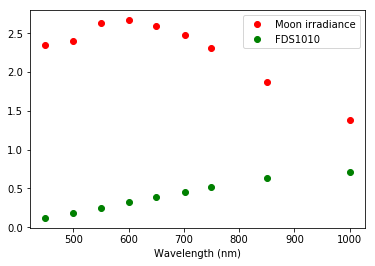

In [19]:
wavelength = np.asarray([449.7,499.9,550.0,600.2,650.1,702.8,750.0,850.2,1000.2]) #in nm
irrad_moon = np.asarray([2.348,2.395,2.633,2.669,2.598,2.474,2.314,1.870,1.387]) # in microW m^2 nm^-1
uncert_irrad_moon = np.asarray([0.85,0.56,0.45,0.44,0.40,0.38,0.37,0.36,0.54]) #% uncertainty.
response_function = np.asarray([0.12,0.18,0.25,0.32,0.39,0.46,0.52,0.63,0.71]) #Approximate response values. A/W units.
print response_function.shape
Spectral_response = irrad_moon*response_function
plt.plot(wavelength,irrad_moon,'ro',label='Moon irradiance')
plt.plot(wavelength,response_function,'go',label='FDS1010')
plt.legend(loc='best')
plt.xlabel('Wavelength (nm)')


[0.28176 0.4311  0.65825 0.85408 1.01322 1.13804 1.20328 1.1781  0.98477]


Text(0,0.5,'Irradiance (x10e-6 A $m^{-2}$ $nm^{-2}$)')

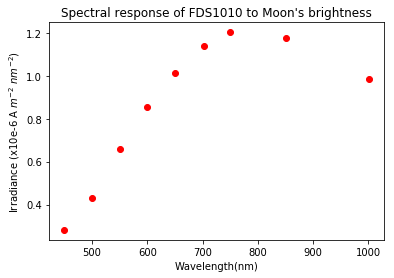

In [14]:
#To find the responsivity, I approximate the response function 
print Spectral_response
plt.plot(wavelength,Spectral_response,'ro')
plt.title('Spectral response of FDS1010 to Moon\'s brightness')
plt.xlabel('Wavelength(nm)')
plt.ylabel('Irradiance (x10e-6 A $m^{-2}$ $nm^{-2}$)')

In [15]:
#Area under curve:
Intensity = np.trapz(Spectral_response,wavelength)
print "Intensity in 10e-6 A m^-2: ",
print Intensity

Intensity in 10e-6 A m^-2:  523.1928625


In [18]:
detect_area = 9.7*9.7*1e-6
Total_intensity = Intensity*detect_area #Value in Amps.
print "Total intensity in 10e-6 C/s: ",
print "%.2E"%Total_intensity
print "Total number of electrons per second for moon: ",
n = Total_intensity*1e-6/(1.6e-19)
print "%.2E" %n
print "Total no of electrons per second for scintillation: ",
n_scint = n*1e-4
print "%.2E"%n_scint
dark = 600e-9/1.6e-19
snr = lambda sc,m,t: sc*np.sqrt(t)/np.sqrt(sc+m)
print "SNR for 2ms: ",
print snr(n_scint,n,2e-3)
print "SNR for 1s: ",
print snr(n_scint,n,1.0)


Total intensity in 10e-6 C/s:  4.92E-02
Total number of electrons per second for moon:  3.08E+11
Total no of electrons per second for scintillation:  3.08E+07
SNR for 2ms:  2.4804811580418398
SNR for 1s:  55.46524486288953
